In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
# imdb의 데이터를 불러와 훈련에 사용할 train과 훈련 후 모델 검증에 사용할 train으로 나누어 저장한다
# 가장 많이 사용하는 단어 10000개만 사용

In [3]:
def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬 생성
    for i, sequence in enumerate(sequences) :
        for j in sequence:
            results[i, j] = 1. # i리뷰에 존재하는 단어의 index j의 값을 1로 변경한다
    return results

In [4]:
x_train = vectorize_sequences(train_data) 
# 훈련 데이터를 각각의 리뷰마다 같은 크기를 가지는 벡터로 변경한다

In [5]:
y_train = np.asarray(train_labels).astype("float32")

In [7]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# 16개의 유닛을 가진 2개의 중간층
# 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세 번째 층
# 마지막 층은 이진 분류 문제의 확률을 출력하기 위해 sigmoid를 사용

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# 이진 분류 문제에서 확률을 출력할 때는 binary_crossentropy가 최선의 선택
# 옵티마이저는 rmsprop을 사용, 대부분의 문제에서 기본으로 사용
# 모니터링 지표로는 정확도를 사용 

history_original = model.fit(x_train, y_train,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 9s 241ms/step - loss: 0.5288 - accuracy: 0.7908 - val_loss: 0.4030 - val_accuracy: 0.8570
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3140 - accuracy: 0.8949 - val_loss: 0.3167 - val_accuracy: 0.8802
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2277 - accuracy: 0.9241 - val_loss: 0.2788 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1786 - accuracy: 0.9425 - val_loss: 0.2926 - val_accuracy: 0.8804
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1475 - accuracy: 0.9541 - val_loss: 0.2947 - val_accuracy: 0.8816
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1211 - accuracy: 0.9634 - val_loss: 0.3035 - val_accuracy: 0.8804
Epoch 7/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1032 - accuracy: 0.9689 - val_loss: 0.3160 - val_accuracy: 0.8802
Epoch 8/20
3

In [8]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# 16개의 유닛을 가진 2개의 중간층
# 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세 번째 층
# 마지막 층은 이진 분류 문제의 확률을 출력하기 위해 sigmoid를 사용

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# 이진 분류 문제에서 확률을 출력할 때는 binary_crossentropy가 최선의 선택
# 옵티마이저는 rmsprop을 사용, 대부분의 문제에서 기본으로 사용
# 모니터링 지표로는 정확도를 사용 

history_smaller_model = model.fit(x_train, y_train,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 133ms/step - loss: 0.6172 - accuracy: 0.6876 - val_loss: 0.5580 - val_accuracy: 0.8296
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5102 - accuracy: 0.8145 - val_loss: 0.5113 - val_accuracy: 0.8040
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4624 - accuracy: 0.8710 - val_loss: 0.4875 - val_accuracy: 0.8613
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4302 - accuracy: 0.9003 - val_loss: 0.4789 - val_accuracy: 0.8600
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4059 - accuracy: 0.9199 - val_loss: 0.4737 - val_accuracy: 0.8647
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3858 - accuracy: 0.9331 - val_loss: 0.4781 - val_accuracy: 0.8598
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3687 - accuracy: 0.9427 - val_loss: 0.4754 - val_accuracy: 0.8629
Epoch 8/20
3

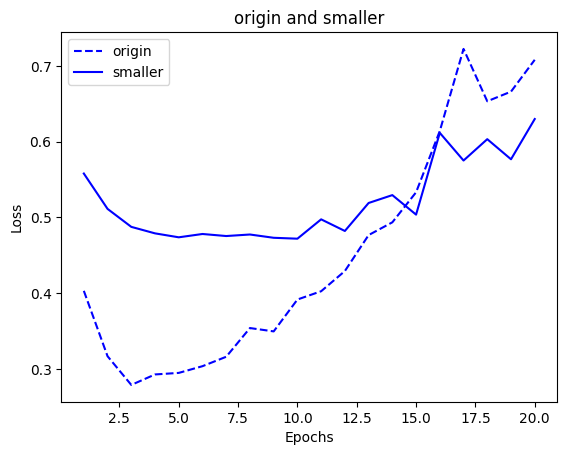

In [14]:
history_origin = history_original.history
origin_val_loss = history_origin["val_loss"]
history_smaller = history_smaller_model.history
smaller_val_loss = history_smaller['val_loss']
epochs = range(1, len(origin_val_loss) + 1)
plt.plot(epochs, origin_val_loss, "b--", label="origin")
plt.plot(epochs, smaller_val_loss, "b-", label="smaller")
plt.title("origin and smaller")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# history에 저장된 데이터를 matplotlib을 이용하여 시각화한다.
# 그래프의 y축은 loss